# Download and  visualise AHN

With datafusion tools it is possible to automatically download AHN2 and AHN3 at any given location.

First it is necessary to import the datafusion tools packages:

In [1]:
import numpy as np
import matplotlib.pylab as plt

from datafusiontools._core.data_input import Geometry
from DataFusionTools.spatial_utils import SpatialUtils, TypesAhn

## AHN along lines

Define an array of points where you want to obtain AHN:


In [2]:
x_ini = 86433.84
y_ini = 439982.755

x, y = [], []
for i in range(2):
    x.append(x_ini + i)
    y.append(y_ini + i)

Collect the AHN3:

In [3]:
# initialize spatial utils
spatial_utils = SpatialUtils(ahn_type=TypesAhn.AHN3)
# get surface line
spatial_utils.get_ahn_surface_line(np.array([x, y]).T)

In [4]:
spatial_utils.AHN_data

array([[8.64338400e+04, 4.39982755e+05, 7.82299995e+00],
       [8.64348400e+04, 4.39983755e+05, 6.11000001e-01]])

Visualise the results

Text(0, 0.5, 'AHN [m]')

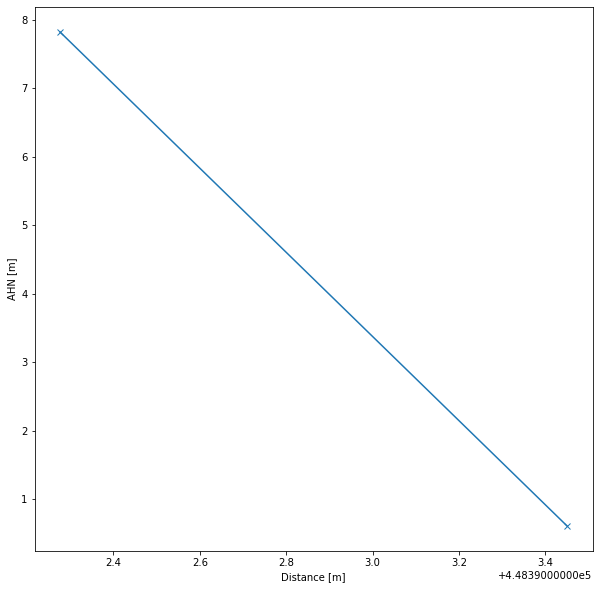

In [5]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

ax.plot(np.sqrt(np.array(spatial_utils.AHN_data)[:, 0]**2 + np.array(spatial_utils.AHN_data)[:, 1]**2),
        np.array(spatial_utils.AHN_data)[:, 2], marker="x")
ax.set_xlabel("Distance [m]")
ax.set_ylabel("AHN [m]")

Extract AHN2:

In [6]:
# initialize spatial utils
spatial_utils2 = SpatialUtils(ahn_type=TypesAhn.AHN2)
# get surface line
spatial_utils2.get_ahn_surface_line(np.array([x, y]).T)

ConnectionError: Connection with the http://geodata.nationaalgeoregister.nl was not successful. 

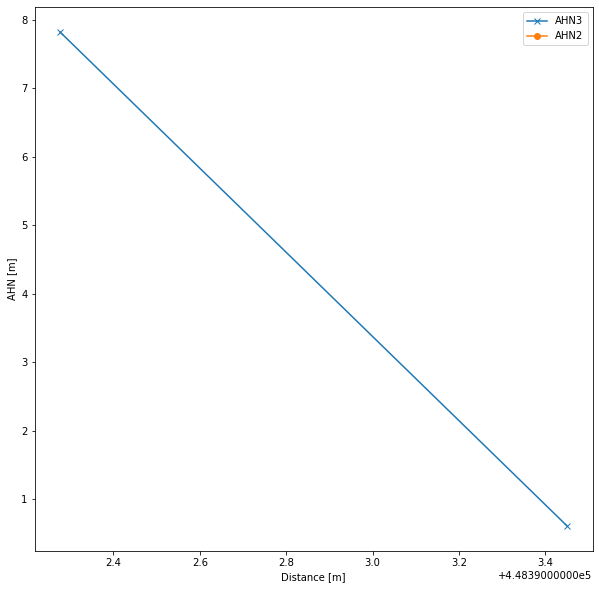

In [7]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

ax.plot(np.sqrt(np.array(spatial_utils.AHN_data)[:, 0]**2 + np.array(spatial_utils.AHN_data)[:, 1]**2),
        np.array(spatial_utils.AHN_data)[:, 2], marker="x", label="AHN3")

ax.plot(np.sqrt(np.array(spatial_utils2.AHN_data)[:, 0]**2 + np.array(spatial_utils2.AHN_data)[:, 1]**2),
        np.array(spatial_utils2.AHN_data)[:, 2], marker="o", label="AHN2")
ax.set_xlabel("Distance [m]")
ax.set_ylabel("AHN [m]")
ax.legend()

## AHN along surfaces

Define a grid to collect the AHN data:

In [8]:
x_ini = 64664
y_ini = 393995

x, y = [], []
for i in range(10):
    x.append(x_ini + i * 10)
    y.append(y_ini + i * 10)
    
x, y = np.meshgrid(x, y, indexing="ij")

In [9]:
# initialize spatial utils
spacial_utils = SpatialUtils()
# get surface line
spacial_utils.get_ahn_surface_line(np.array([x.ravel(), y.ravel()]).T)

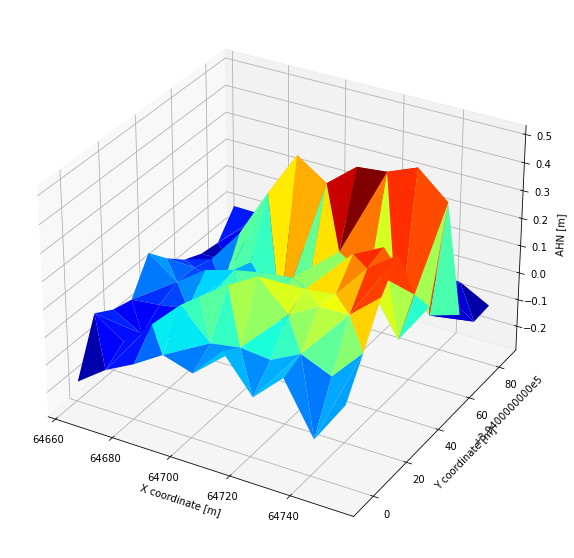

In [10]:
import matplotlib.tri as mtri
triang = mtri.Triangulation(np.array(spacial_utils.AHN_data)[:, 0], np.array(spacial_utils.AHN_data)[:, 1])
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.plot_trisurf(triang, np.array(spacial_utils.AHN_data)[:, 2], cmap='jet')
ax.set_xlabel("X coordinate [m]")
ax.set_ylabel("Y coordinate [m]")
ax.set_zlabel("AHN [m]")
plt.show()